In [1]:
import os, re, sys
import nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
german_stop_words = stopwords.words('german')
german_stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [4]:
erlkoenig = [('Wer reitet so spät durch Nacht und Wind?'),
('Es ist der Vater mit seinem Kind;'),
('Er hat den Knaben wohl in dem Arm,'),
('Er fasst ihn sicher, er hält ihn warm.'),
('Mein Sohn, was birgst du so bang dein Gesicht? –'),
('Siehst, Vater, du den Erlkönig nicht?'),
('Den Erlenkönig mit Kron’ und Schweif? –'),
('Mein Sohn, es ist ein Nebelstreif. –'),
('„Du liebes Kind, komm, geh mit mir!'),
('Gar schöne Spiele spiel’ ich mit dir;'),
('Manch’ bunte Blumen sind an dem Strand,'),
('Meine Mutter hat manch gülden Gewand.“ –'),
('Mein Vater, mein Vater, und hörest du nicht,'),
('Was Erlenkönig mir leise verspricht? –'),
('Sei ruhig, bleibe ruhig, mein Kind;'),
('In dürren Blättern säuselt der Wind. –'),
('„Willst, feiner Knabe, du mit mir gehn?'),
('Meine Töchter sollen dich warten schön;'),
('Meine Töchter führen den nächtlichen Reihn'),
('Und wiegen und tanzen und singen dich ein.“ –'),
('Mein Vater, mein Vater, und siehst du nicht dort'),
('Erlkönigs Töchter am düstern Ort? –'),
('Mein Sohn, mein Sohn, ich seh’ es genau:'),
('Es scheinen die alten Weiden so grau. –'),
('„Ich liebe dich, mich reizt deine schöne Gestalt;'),
('Und bist du nicht willig, so brauch’ ich Gewalt.“ –'),
('Mein Vater, mein Vater, jetzt fasst er mich an!'),
('Erlkönig hat mir ein Leids getan! –'),
('Dem Vater grauset’s; er reitet geschwind,'),
('Er hält in Armen das ächzende Kind,'),
('Erreicht den Hof mit Mühe und Not;'),
('In seinen Armen das Kind war tot.')]

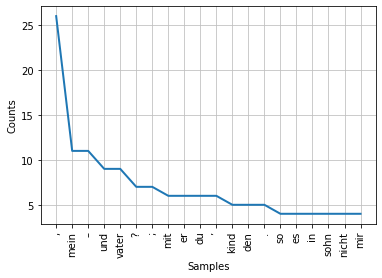

In [5]:
test = pd.DataFrame(erlkoenig)
test.columns = ["text"]
test["text"] = test["text"].str.lower().apply(nltk.word_tokenize)
nltk.FreqDist(sum(test["text"], [])).plot(20, cumulative=False)

In [16]:
test = pd.DataFrame(erlkoenig)
test.columns = ["text"]
test

,text
0,Wer reitet so spät durch Nacht und Wind?
1,Es ist der Vater mit seinem Kind;
2,"Er hat den Knaben wohl in dem Arm,"
3,"Er fasst ihn sicher, er hält ihn warm."
4,"Mein Sohn, was birgst du so bang dein Gesicht? –"
5,"Siehst, Vater, du den Erlkönig nicht?"
6,Den Erlenkönig mit Kron’ und Schweif? –
7,"Mein Sohn, es ist ein Nebelstreif. –"
8,"„Du liebes Kind, komm, geh mit mir!"
9,Gar schöne Spiele spiel’ ich mit dir;


In [17]:
test["text"] = test["text"].str.lower().str.split()
test.head()

,text
0,"[wer, reitet, so, spät, durch, nacht, und, wind?]"
1,"[es, ist, der, vater, mit, seinem, kind;]"
2,"[er, hat, den, knaben, wohl, in, dem, arm,]"
3,"[er, fasst, ihn, sicher,, er, hält, ihn, warm.]"
4,"[mein, sohn,, was, birgst, du, so, bang, dein,..."


In [19]:
test_2 = test["text"].apply(lambda x: [item for item in x if item not in german_stop_words])
test_2.head()

0     [wer, reitet, spät, nacht, wind?]
1                        [vater, kind;]
2                  [knaben, wohl, arm,]
3         [fasst, sicher,, hält, warm.]
4    [sohn,, birgst, bang, gesicht?, –]
Name: text, dtype: object

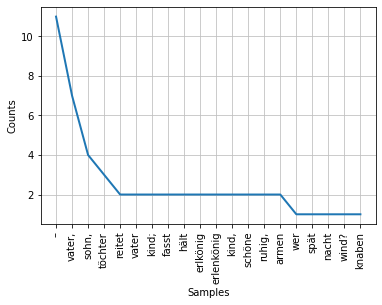

In [6]:
test = pd.DataFrame(erlkoenig)
test.columns = ["text"]
test["text"] = test["text"].str.lower().str.split().apply(lambda x: [item for item in x if item not in german_stop_words])
#test["text"] = test["text"].str.lower().apply(nltk.word_tokenize)
test
nltk.FreqDist(sum(test["text"], [])).plot(20, cumulative=False)

In [ ]:
test = pd.DataFrame(erlkoenig)
test.columns = ["text"]
test["text"] = test["text"].str.replace('ä', 'ae')
test["text"] = test["text"].str.replace('ö', 'oe')
test

,text
0,Wer reitet so spaet durch Nacht und Wind?
1,Es ist der Vater mit seinem Kind;
2,"Er hat den Knaben wohl in dem Arm,"
3,"Er fasst ihn sicher, er haelt ihn warm."
4,"Mein Sohn, was birgst du so bang dein Gesicht? –"
5,"Siehst, Vater, du den Erlkoenig nicht?"
6,Den Erlenkoenig mit Kron’ und Schweif? –
7,"Mein Sohn, es ist ein Nebelstreif. –"
8,"„Du liebes Kind, komm, geh mit mir!"
9,Gar schoene Spiele spiel’ ich mit dir;
